# Lab 6.03 - Regression analysis

In [7]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [8]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [9]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [10]:
for c in cols_with_dollars:
    movies[c] = movies[c].str.replace('$','').str.replace(' ', '').astype(float) / 1000000
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

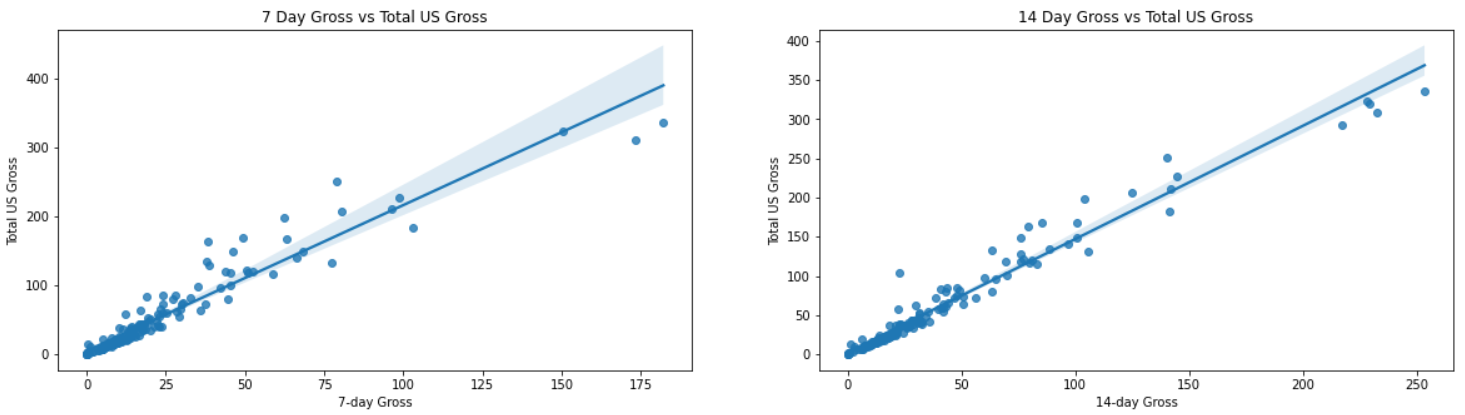

Text(0.5, 1.0, '14-day Gross vs Total US gross')

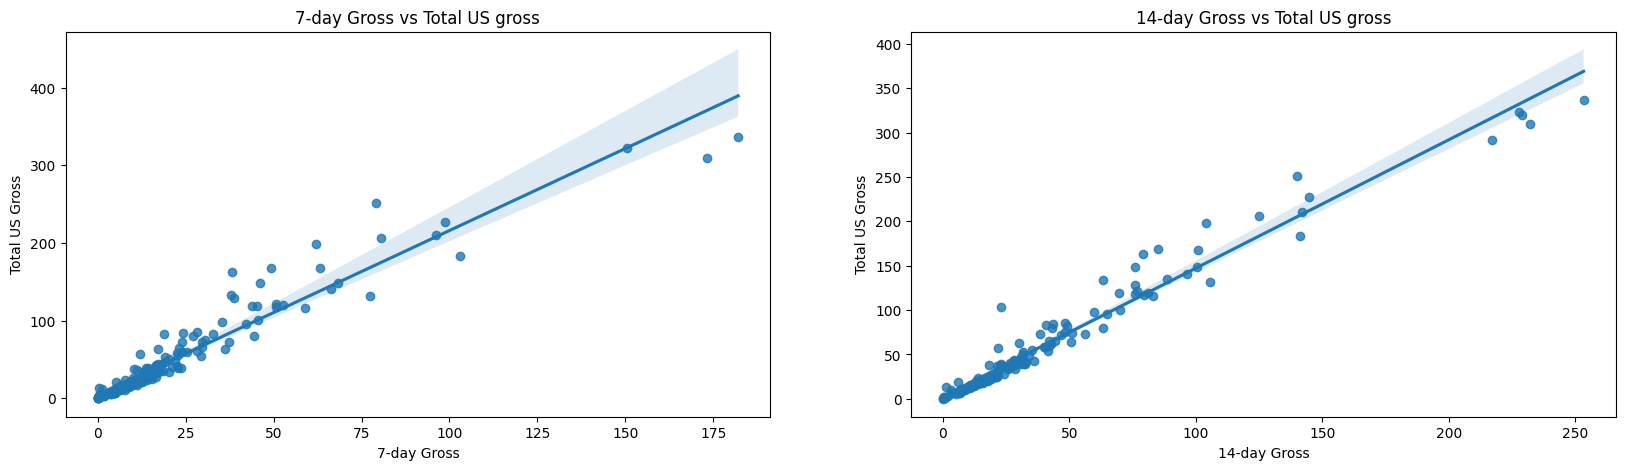

In [11]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
sns.regplot(ax=axs[0],x=movies['7-day Gross'], y=movies['Total US Gross'])
axs[0].set_title('7-day Gross vs Total US gross')

sns.regplot(ax=axs[1],x=movies['14-day Gross'], y=movies['Total US Gross'])
axs[1].set_title('14-day Gross vs Total US gross')

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [12]:
cor = np.corrcoef(movies['7-day Gross'], movies['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

cor = np.corrcoef(movies['14-day Gross'], movies['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

# Er zitten verschillende NAN in de data, die moeten er uit
# je mag niet zo maar droppen, want in sommige kolomment zitten er ook NAN terwijl er wel data in zit.

R=nan
R²=nan
R=nan
R²=nan


In [14]:
mv_7 = movies.dropna(subset=['7-day Gross','Total US Gross'])
mv_14 = movies.dropna(subset=['14-day Gross','Total US Gross'])


In [15]:
cor = np.corrcoef(mv_7['7-day Gross'], mv_7['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

cor = np.corrcoef(mv_14['14-day Gross'], mv_14['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

R=0.9594
R²=0.9205
R=0.9813
R²=0.9630


# Conclusie voor beiden

R > 0 => Stijgend verband
R ~ 0.95 => uitzonderlijk sterk verband
R² ~ 0.9 => Uitzonderlijk sterk verband
De variantie van de afhankelijk veranderlijke wordt voor meer dan 90% bepaald door de onafhankelijk veranderlijke

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [16]:
# 7-day gross
x = mv_7['7-day Gross']
y = mv_7['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7-day Gross: y = {a} * x + {b}')
# a = 2.11 => De helft van opbrengst wordt gerealiseerd in de eerste week (totale opbrengst = opbrengst week 1 * 2.11)
# Stel x = 0 (niemand komt kijken), dan zou de film nog altijd 4.59 MIO opbrengen

7-day Gross: y = 2.113464756610182 * x + 4.590921233818133


In [17]:
# 14-day gross
x = mv_14['14-day Gross']
y = mv_14['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14-day Gross: y = {a} * x + {b}')
# a = 1.44 : na 14 dagen is al 1/1.44 % van de inkomsten gegenereerd 

14-day Gross: y = 1.44645307025908 * x + 2.449002892551066


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

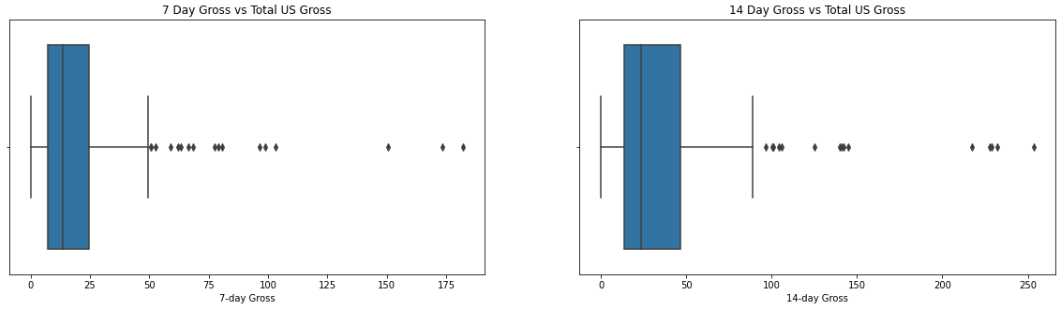

Text(0.5, 1.0, '14-day Gross VS Total US Gross')

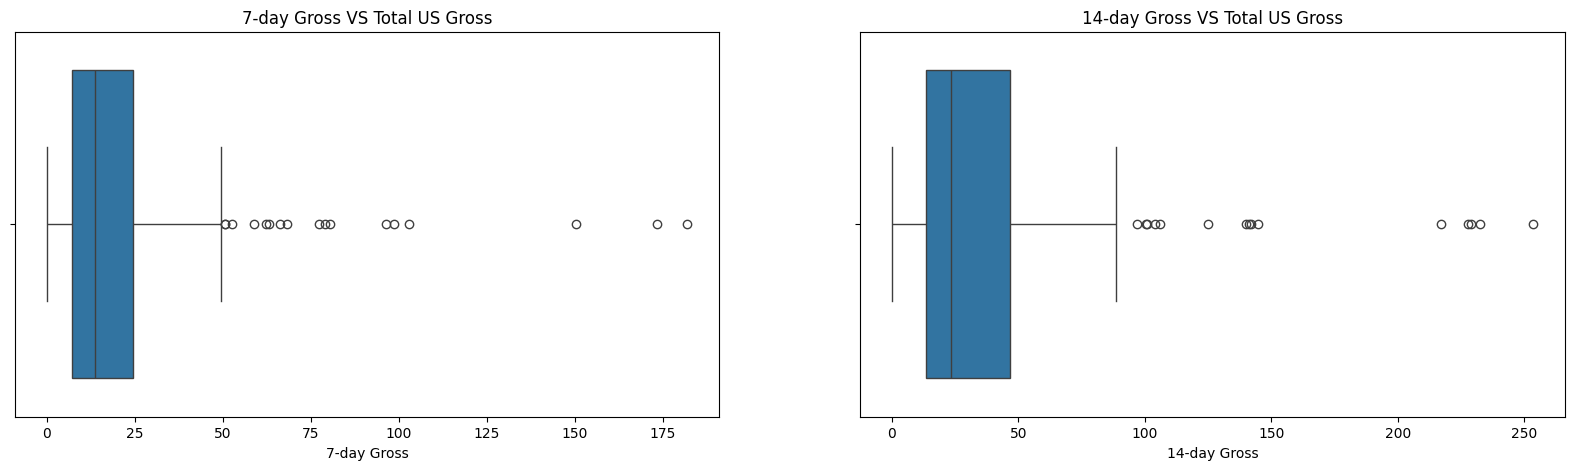

In [18]:
fix, axs = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(ax=axs[0],x=mv_7['7-day Gross'])
axs[0].set_title('7-day Gross VS Total US Gross')

sns.boxplot(ax=axs[1],x=mv_14['14-day Gross'])
axs[1].set_title('14-day Gross VS Total US Gross')

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [64]:
# We gaan alle outliers er uit halen
# Outliers = Interkwartiel afstand

interkwartielafstand = mv_7['7-day Gross'].quantile(0.75) - mv_7['7-day Gross'].quantile(0.25)
limit_7 = mv_7['7-day Gross'].quantile(0.75)+1.5 * interkwartielafstand

interkwartielafstand = mv_14['14-day Gross'].quantile(0.75) - mv_14['14-day Gross'].quantile(0.25)
limit_14 = mv_14['14-day Gross'].quantile(0.75)+1.5 * interkwartielafstand

In [65]:
mv_7[mv_7['7-day Gross'] >= limit_7].head(10)

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50.705336,79.668309,117.144465,194.600000,47.716836,85.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
31,32.0,I Now Pronounce You Chuck and Larry,Universal,Comedy,52.547115,81.169105,119.725280,65.983182,69.258990,85.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
59,60.0,Superbad,Sony Pictures,Comedy,50.572274,76.834795,121.463226,48.400000,134.374749,17.5


In [66]:
mv_7 = mv_7[mv_7['7-day Gross'] <= limit_7]
mv_14 = mv_14[mv_14['14-day Gross']<= limit_14]

* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

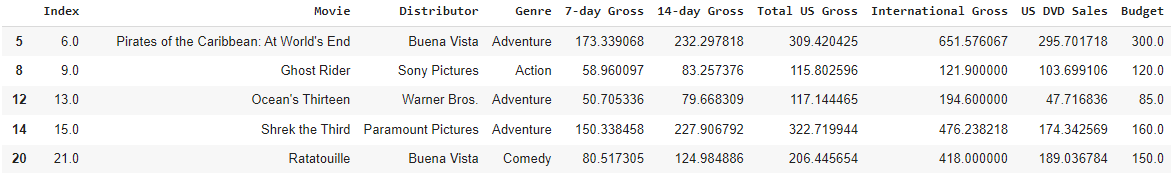

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [67]:
cor = np.corrcoef(mv_7['7-day Gross'], mv_7['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

cor = np.corrcoef(mv_14['14-day Gross'], mv_14['Total US Gross'])[0][1]
print(f"R={cor:.4f}")
print(f"R²={cor**2:.4f}")

R=0.9325
R²=0.8695
R=0.9584
R²=0.9186


# Conclusie voor beiden

R > 0 => Stijgend verband
R ~ 0.94 => uitzonderlijk sterk verband
R² ~ 0.9 => Uitzonderlijk sterk verband
De variantie van de afhankelijk veranderlijke wordt voor meer dan 90% bepaald door de onafhankelijk veranderlijke

In [68]:
# 7-day gross
x = mv_7['7-day Gross']
y = mv_7['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7-day Gross: y = {a} * x + {b}')
# a = 2.74 => De totale opbrengst zal de opbrengst van de eerste week (eerste 7 dagen) * 2.75 zijn (dit zonder outliers)
# Stel x = 0 (niemand komt kijken), dan zou de film 5.07 MIO verlies draaien
# Bij de kaskrakers ligt een groter percentage van de opbrengst in de 1e week.

7-day Gross: y = 2.7456809688135655 * x + -5.073945979380604


In [71]:
# 14-day gross
x = mv_14['14-day Gross']
y = mv_14['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14-day Gross: y = {a} * x + {b}')
# a = 1.44 : na 14 dagen is al 1/1.44 % van de inkomsten gegenereerd 

14-day Gross: y = 1.6529869503645325 * x + -3.22735495109689


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x